In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import sklearn.datasets as datasets
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

C:\Users\SaraR\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
years = [2015, 2016, 2017, 2018, 2019]
ds_15 = pd.read_csv('data/2015.csv').drop(['Standard Error'],axis=1)
ds_15.rename(columns={"Happiness Rank": "Rank","Happiness Score":"Score","Economy (GDP per Capita)":"GDP","Family":"Social support","Health (Life Expectancy)":"Healthy","Trust (Government Corruption)":"Trust"},inplace=True)  
ds_15.insert(0, "Year", 2015)
ds_15['Rounded Score'] = ds_15['Score'].round(0)

ds_16 = pd.read_csv('data/2016.csv').drop(['Lower Confidence Interval','Upper Confidence Interval'],axis=1)
ds_16.rename(columns={"Happiness Rank": "Rank","Happiness Score":"Score","Economy (GDP per Capita)":"GDP","Family":"Social support","Health (Life Expectancy)":"Healthy","Trust (Government Corruption)":"Trust"},inplace=True) 
ds_16.insert(0, "Year", 2016)
ds_16['Rounded Score'] = ds_16['Score'].round(0)

ds_17 = pd.read_csv('data/2017.csv').drop(['Whisker.high','Whisker.low'],axis=1)
ds_17.rename(columns={"Happiness.Rank": "Rank","Happiness.Score":"Score","Economy..GDP.per.Capita.":"GDP","Family":"Social support","Health..Life.Expectancy.":"Healthy","Trust..Government.Corruption.":"Trust","Dystopia.Residual":"Dystopia Residual"},inplace=True) 
ds_17.insert(0, "Year", 2017)
ds_17 = ds_17.join(ds_15.set_index('Country')['Region'], on='Country')
ds_17['Rounded Score'] = ds_17['Score'].round(0)

ds_18 = pd.read_csv('data/2018.csv')
ds_18.rename(columns={"Country or region": "Country", "Overall rank": "Rank","Score":"Score","GDP per capita":"GDP","Healthy life expectancy":"Healthy","Freedom to make life choices":"Freedom","Perceptions of corruption":"Trust"},inplace=True)
ds_18.insert(0, "Year", 2018)
ds_18 = ds_18.join(ds_15.set_index('Country')['Region'], on='Country')
ds_18['Rounded Score'] = ds_18['Score'].round(0)

ds_19 = pd.read_csv('data/2019.csv')
ds_19.rename(columns={"Country or region": "Country", "Overall rank": "Rank","GDP per capita":"GDP","Healthy life expectancy":"Healthy","Freedom to make life choices":"Freedom","Perceptions of corruption":"Trust"},inplace=True)
ds_19.insert(0, "Year", 2019)
ds_19 = ds_19.join(ds_15.set_index('Country')['Region'], on='Country')
ds_19['Rounded Score'] = ds_19['Score'].round(0)

df = pd.concat([ds_15, ds_16, ds_17, ds_18, ds_19], sort=True, ignore_index=True)

df

Country  Dystopia Residual  Freedom      GDP  \
0                 Switzerland            2.51738  0.66557  1.39651   
1                     Iceland            2.70201  0.62877  1.30232   
2                     Denmark            2.49204  0.64938  1.32548   
3                      Norway            2.46531  0.66973  1.45900   
4                      Canada            2.45176  0.63297  1.32629   
..                        ...                ...      ...      ...   
777                    Rwanda                NaN  0.55500  0.35900   
778                  Tanzania                NaN  0.41700  0.47600   
779               Afghanistan                NaN  0.00000  0.35000   
780  Central African Republic                NaN  0.22500  0.02600   
781               South Sudan                NaN  0.01000  0.30600   

     Generosity  Healthy  Rank              Region  Rounded Score  Score  \
0       0.29678  0.94143     1      Western Europe            8.0  7.587   
1       0.43630  0.94784     2      Western Europe            8.0  7.561   
2       0.34139  0.87464     3      Western Europe            8.0  7.527   
3       0.34699  0.88521     4      Western Europe            8.0  7.522   
4       0.45811  0.90563     5       North America            7.0  7.427   
..          ...      ...   ...                 ...            ...    ...   
777     0.21700  0.61400   152  Sub-Saharan Africa            3.0  3.334   
778     0.27600  0.49900   153  Sub-Saharan Africa            3.0  3.231   
779     0.15800  0.36100   154       Southern Asia            3.0  3.203   
780     0.23500  0.10500   155  Sub-Saharan Africa            3.0  3.083   
781     0.20200  0.29500   156                 NaN            3.0  2.853   

     Social support    Trust  Year  
0           1.34951  0.41978  2015  
1           1.40223  0.14145  2015  
2           1.36058  0.48357  2015  
3           1.33095  0.36503  2015  
4           1.32261  0.32957  2015  
..              ...      ...   ...  
777         0.71100  0.41100  2019  
778         0.88500  0.14700  2019  
779         0.51700  0.02500  2019  
780         0.00000  0.03500  2019  
781         0.57500  0.09100  2019  

[782 rows x 13 columns]

In [3]:
""" Adding external data. """
edf = pd.read_csv('data/wdidata.csv')

In [4]:
df['Mujeres trab.agricultura'] = np.nan
df['GDP por trabajador'] = np.nan
df['Participación lab.1524'] = np.nan
df['Mujeres trab.servicios'] = np.nan
df['Mujeres desempleadas'] = np.nan
df['Hombres mas 80'] = np.nan
df['Transporte aereo'] = np.nan
df['Mujeres desempleadas.1524'] = np.nan
df['Ratio dif empleo genero'] = np.nan
df['Refugiados'] = np.nan

for index, row in df.iterrows():
    country_name = row['Country']
    year = row['Year']
    if year in years:
        mujeres_campo = edf.loc[(edf['Country Name'] == country_name) & (edf['Indicator Code'] == 'SL.AGR.EMPL.FE.ZS')][str(year)]
        if mujeres_campo.values.size > 0:
            df.at[index, 'Mujeres trab.agricultura'] = mujeres_campo.values[0]
        gdp_por_trab = edf.loc[(edf['Country Name'] == country_name) & (edf['Indicator Code'] == 'SL.GDP.PCAP.EM.KD')][str(year)]
        if gdp_por_trab.values.size > 0:
            df.at[index, 'GDP por trabajador'] = gdp_por_trab.values[0]
        participacion = edf.loc[(edf['Country Name'] == country_name) & (edf['Indicator Code'] == 'SL.TLF.ACTI.1524.FE.ZS')][str(year)]
        if participacion.values.size > 0:
            df.at[index, 'Participación lab.1524'] = participacion.values[0]
        muj_trab_ser = edf.loc[(edf['Country Name'] == country_name) & (edf['Indicator Code'] == 'SL.SRV.EMPL.FE.ZS')][str(year)]
        if muj_trab_ser.values.size > 0:
            df.at[index, 'Mujeres trab.servicios'] = muj_trab_ser.values[0]
        muj_des = edf.loc[(edf['Country Name'] == country_name) & (edf['Indicator Code'] == 'SL.UEM.TOTL.FE.ZS')][str(year)]
        if muj_des.values.size > 0:
            df.at[index, 'Mujeres desempleadas'] = muj_des.values[0]
        hom_up_80 = edf.loc[(edf['Country Name'] == country_name) & (edf['Indicator Code'] == 'SP.POP.80UP.MA.5Y')][str(year)]
        if hom_up_80.values.size > 0:
            df.at[index, 'Hombres mas 80'] = hom_up_80.values[0]
        trans_aereo = edf.loc[(edf['Country Name'] == country_name) & (edf['Indicator Code'] == 'IS.AIR.DPRT')][str(year)]
        if trans_aereo.values.size > 0:
            df.at[index, 'Transporte aereo'] = trans_aereo.values[0]
        muj_desem = edf.loc[(edf['Country Name'] == country_name) & (edf['Indicator Code'] == 'SL.UEM.1524.FE.ZS')][str(year)]
        if muj_desem.values.size > 0:
            df.at[index, 'Mujeres desempleadas.1524'] = muj_desem.values[0]
        diff_gen = edf.loc[(edf['Country Name'] == country_name) & (edf['Indicator Code'] == 'SL.TLF.CACT.FM.ZS')][str(year)]
        if diff_gen.values.size > 0:
            df.at[index, 'Ratio dif empleo genero'] = diff_gen.values[0]
        refug = edf.loc[(edf['Country Name'] == country_name) & (edf['Indicator Code'] == 'SM.POP.REFG.OR')][str(year)]
        if refug.values.size > 0:
            df.at[index, 'Refugiados'] = refug.values[0]

df
 

Country  Dystopia Residual  Freedom      GDP  \
0                 Switzerland            2.51738  0.66557  1.39651   
1                     Iceland            2.70201  0.62877  1.30232   
2                     Denmark            2.49204  0.64938  1.32548   
3                      Norway            2.46531  0.66973  1.45900   
4                      Canada            2.45176  0.63297  1.32629   
..                        ...                ...      ...      ...   
777                    Rwanda                NaN  0.55500  0.35900   
778                  Tanzania                NaN  0.41700  0.47600   
779               Afghanistan                NaN  0.00000  0.35000   
780  Central African Republic                NaN  0.22500  0.02600   
781               South Sudan                NaN  0.01000  0.30600   

     Generosity  Healthy  Rank              Region  Rounded Score  Score  ...  \
0       0.29678  0.94143     1      Western Europe            8.0  7.587  ...   
1       0.43630  0.94784     2      Western Europe            8.0  7.561  ...   
2       0.34139  0.87464     3      Western Europe            8.0  7.527  ...   
3       0.34699  0.88521     4      Western Europe            8.0  7.522  ...   
4       0.45811  0.90563     5       North America            7.0  7.427  ...   
..          ...      ...   ...                 ...            ...    ...  ...   
777     0.21700  0.61400   152  Sub-Saharan Africa            3.0  3.334  ...   
778     0.27600  0.49900   153  Sub-Saharan Africa            3.0  3.231  ...   
779     0.15800  0.36100   154       Southern Asia            3.0  3.203  ...   
780     0.23500  0.10500   155  Sub-Saharan Africa            3.0  3.083  ...   
781     0.20200  0.29500   156                 NaN            3.0  2.853  ...   

     Mujeres trab.agricultura  GDP por trabajador  Participación lab.1524  \
0                    2.872000       103602.585938               68.313004   
1                    1.744000        75040.609375               81.785004   
2                    1.059000        94613.531250               62.389999   
3                    0.921000       125677.398438               56.618000   
4                    1.015000        84005.359375               64.448997   
..                        ...                 ...                     ...   
777                 71.512001         4223.943848               63.733002   
778                 67.431999         6497.994141               69.106003   
779                 65.230003         6984.897949               20.403999   
780                 81.317001         2048.333984               52.889000   
781                 73.223000         4464.730957               63.477001   

     Mujeres trab.servicios  Mujeres desempleadas  Hombres mas 80  \
0                 87.030998                 4.912        3.705261   
1                 91.330002                 4.051        3.029846   
2                 89.277000                 6.444        3.218882   
3                 91.870003                 3.999        3.129684   
4                 90.433998                 6.285        3.270799   
..                      ...                   ...             ...   
777               25.662001                 1.070             NaN   
778               29.461000                 2.462             NaN   
779               10.079000                14.004             NaN   
780               15.996000                 3.565             NaN   
781               18.926001                13.406             NaN   

     Transporte aereo  Mujeres desempleadas.1524  Ratio dif empleo genero  \
0            250094.0                   8.390000                84.080678   
1             35558.0                   6.638000                90.302418   
2                 NaN                  10.027000                86.857312   
3                 NaN                   8.565000                89.632442   
4           1322033.0                  11.228000                86.29

In [5]:
missing_values_count=df.isnull().sum()

missing_values_count

Country                        0
Dystopia Residual            312
Freedom                        0
GDP                            0
Generosity                     0
Healthy                        0
Rank                           0
Region                        19
Rounded Score                  0
Score                          0
Social support                 0
Trust                          1
Year                           0
Mujeres trab.agricultura     100
GDP por trabajador           100
Participación lab.1524       100
Mujeres trab.servicios       100
Mujeres desempleadas         100
Hombres mas 80               235
Transporte aereo             311
Mujeres desempleadas.1524    100
Ratio dif empleo genero      100
Refugiados                   250
dtype: int64

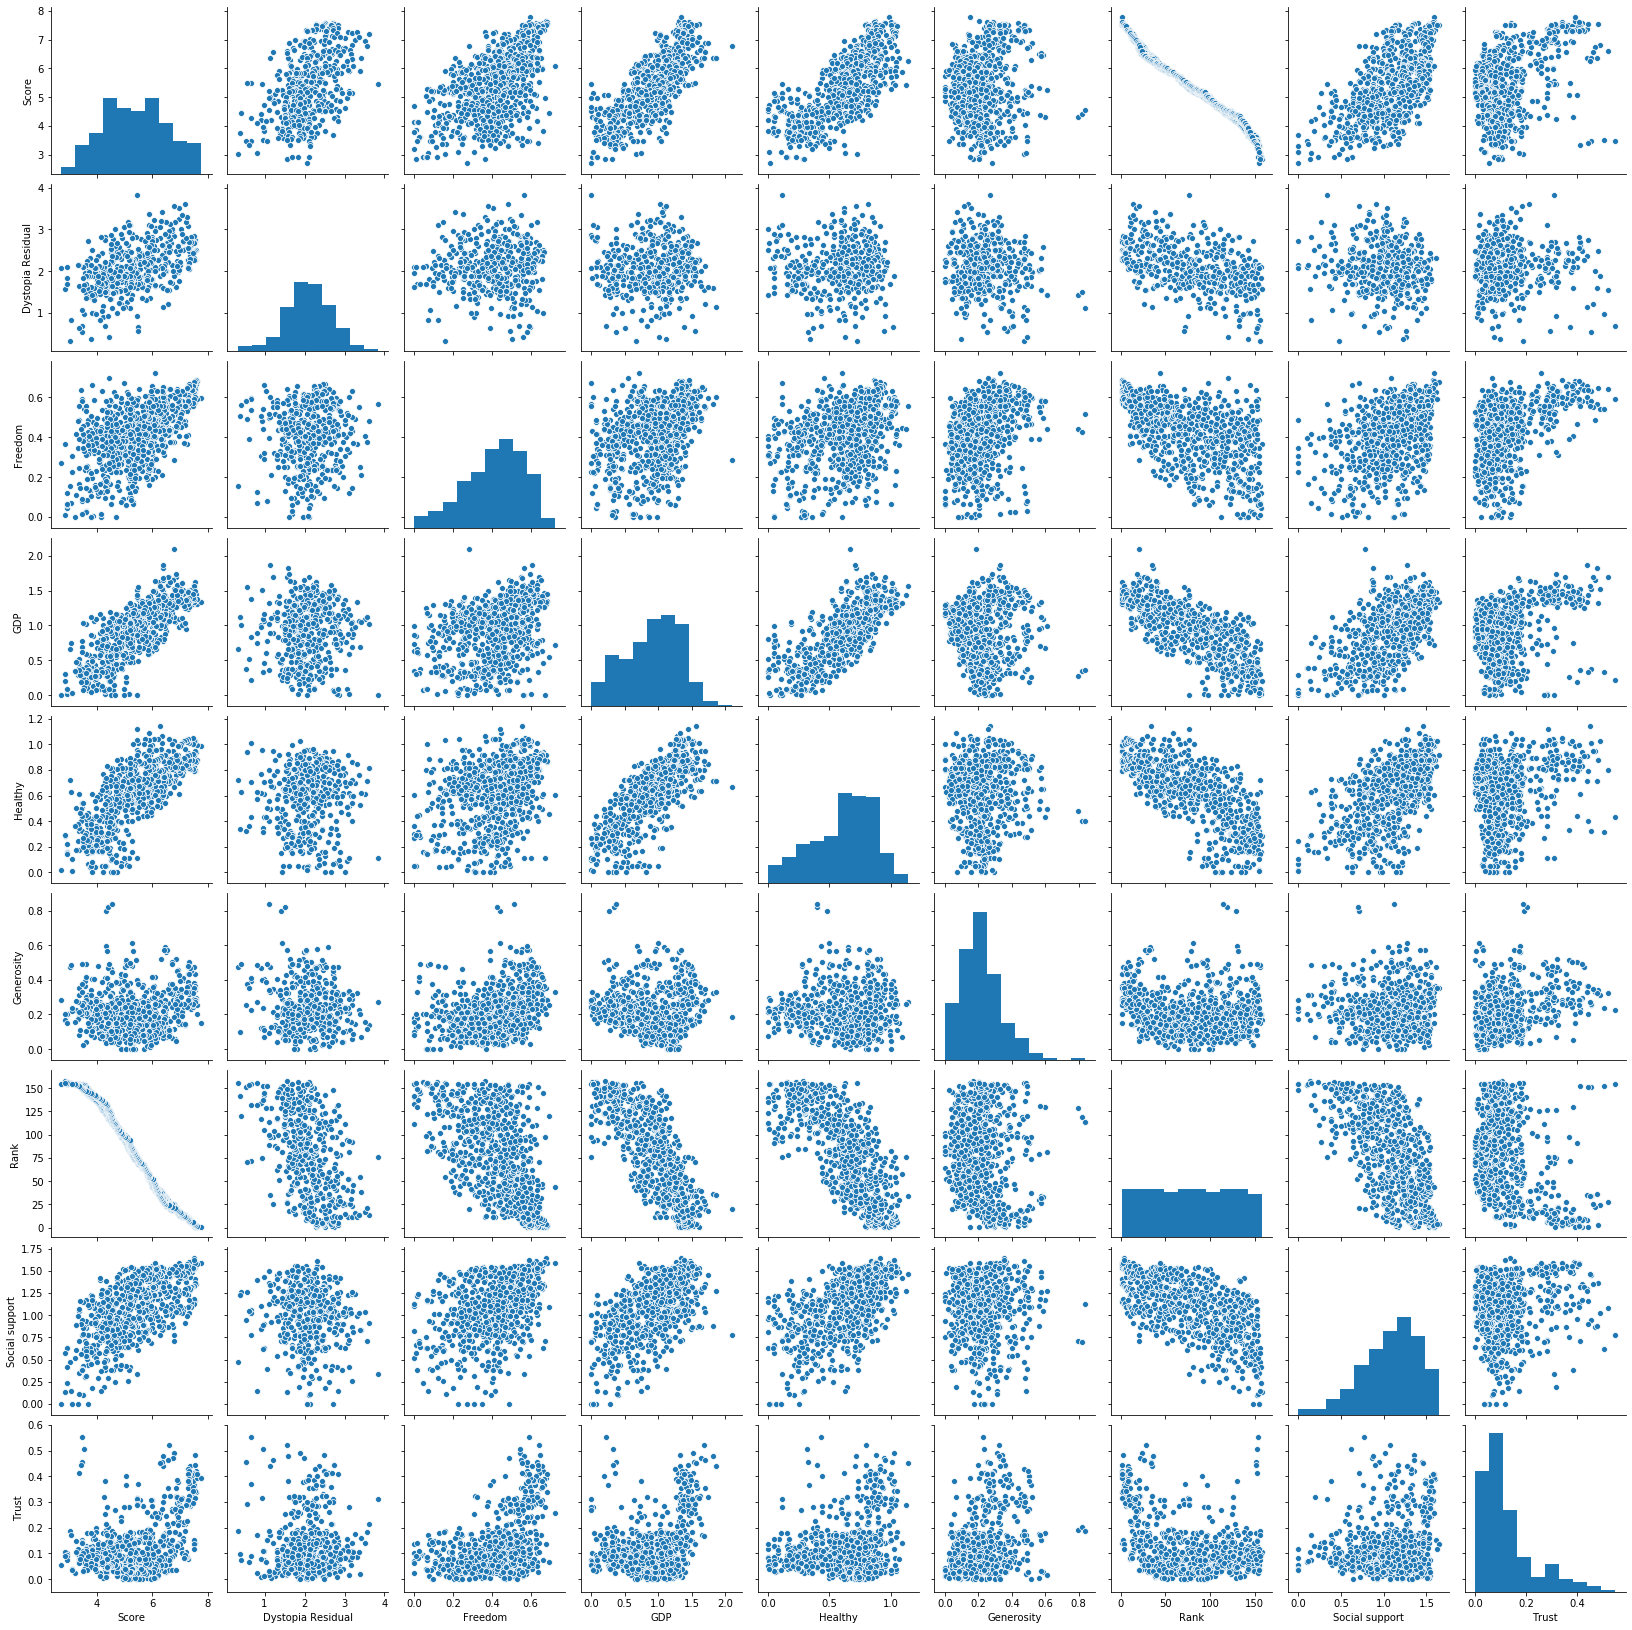

In [6]:
sns.pairplot(df, diag_kind='hist', vars=['Score','Dystopia Residual','Freedom','GDP','Healthy','Generosity','Rank','Social support','Trust'])

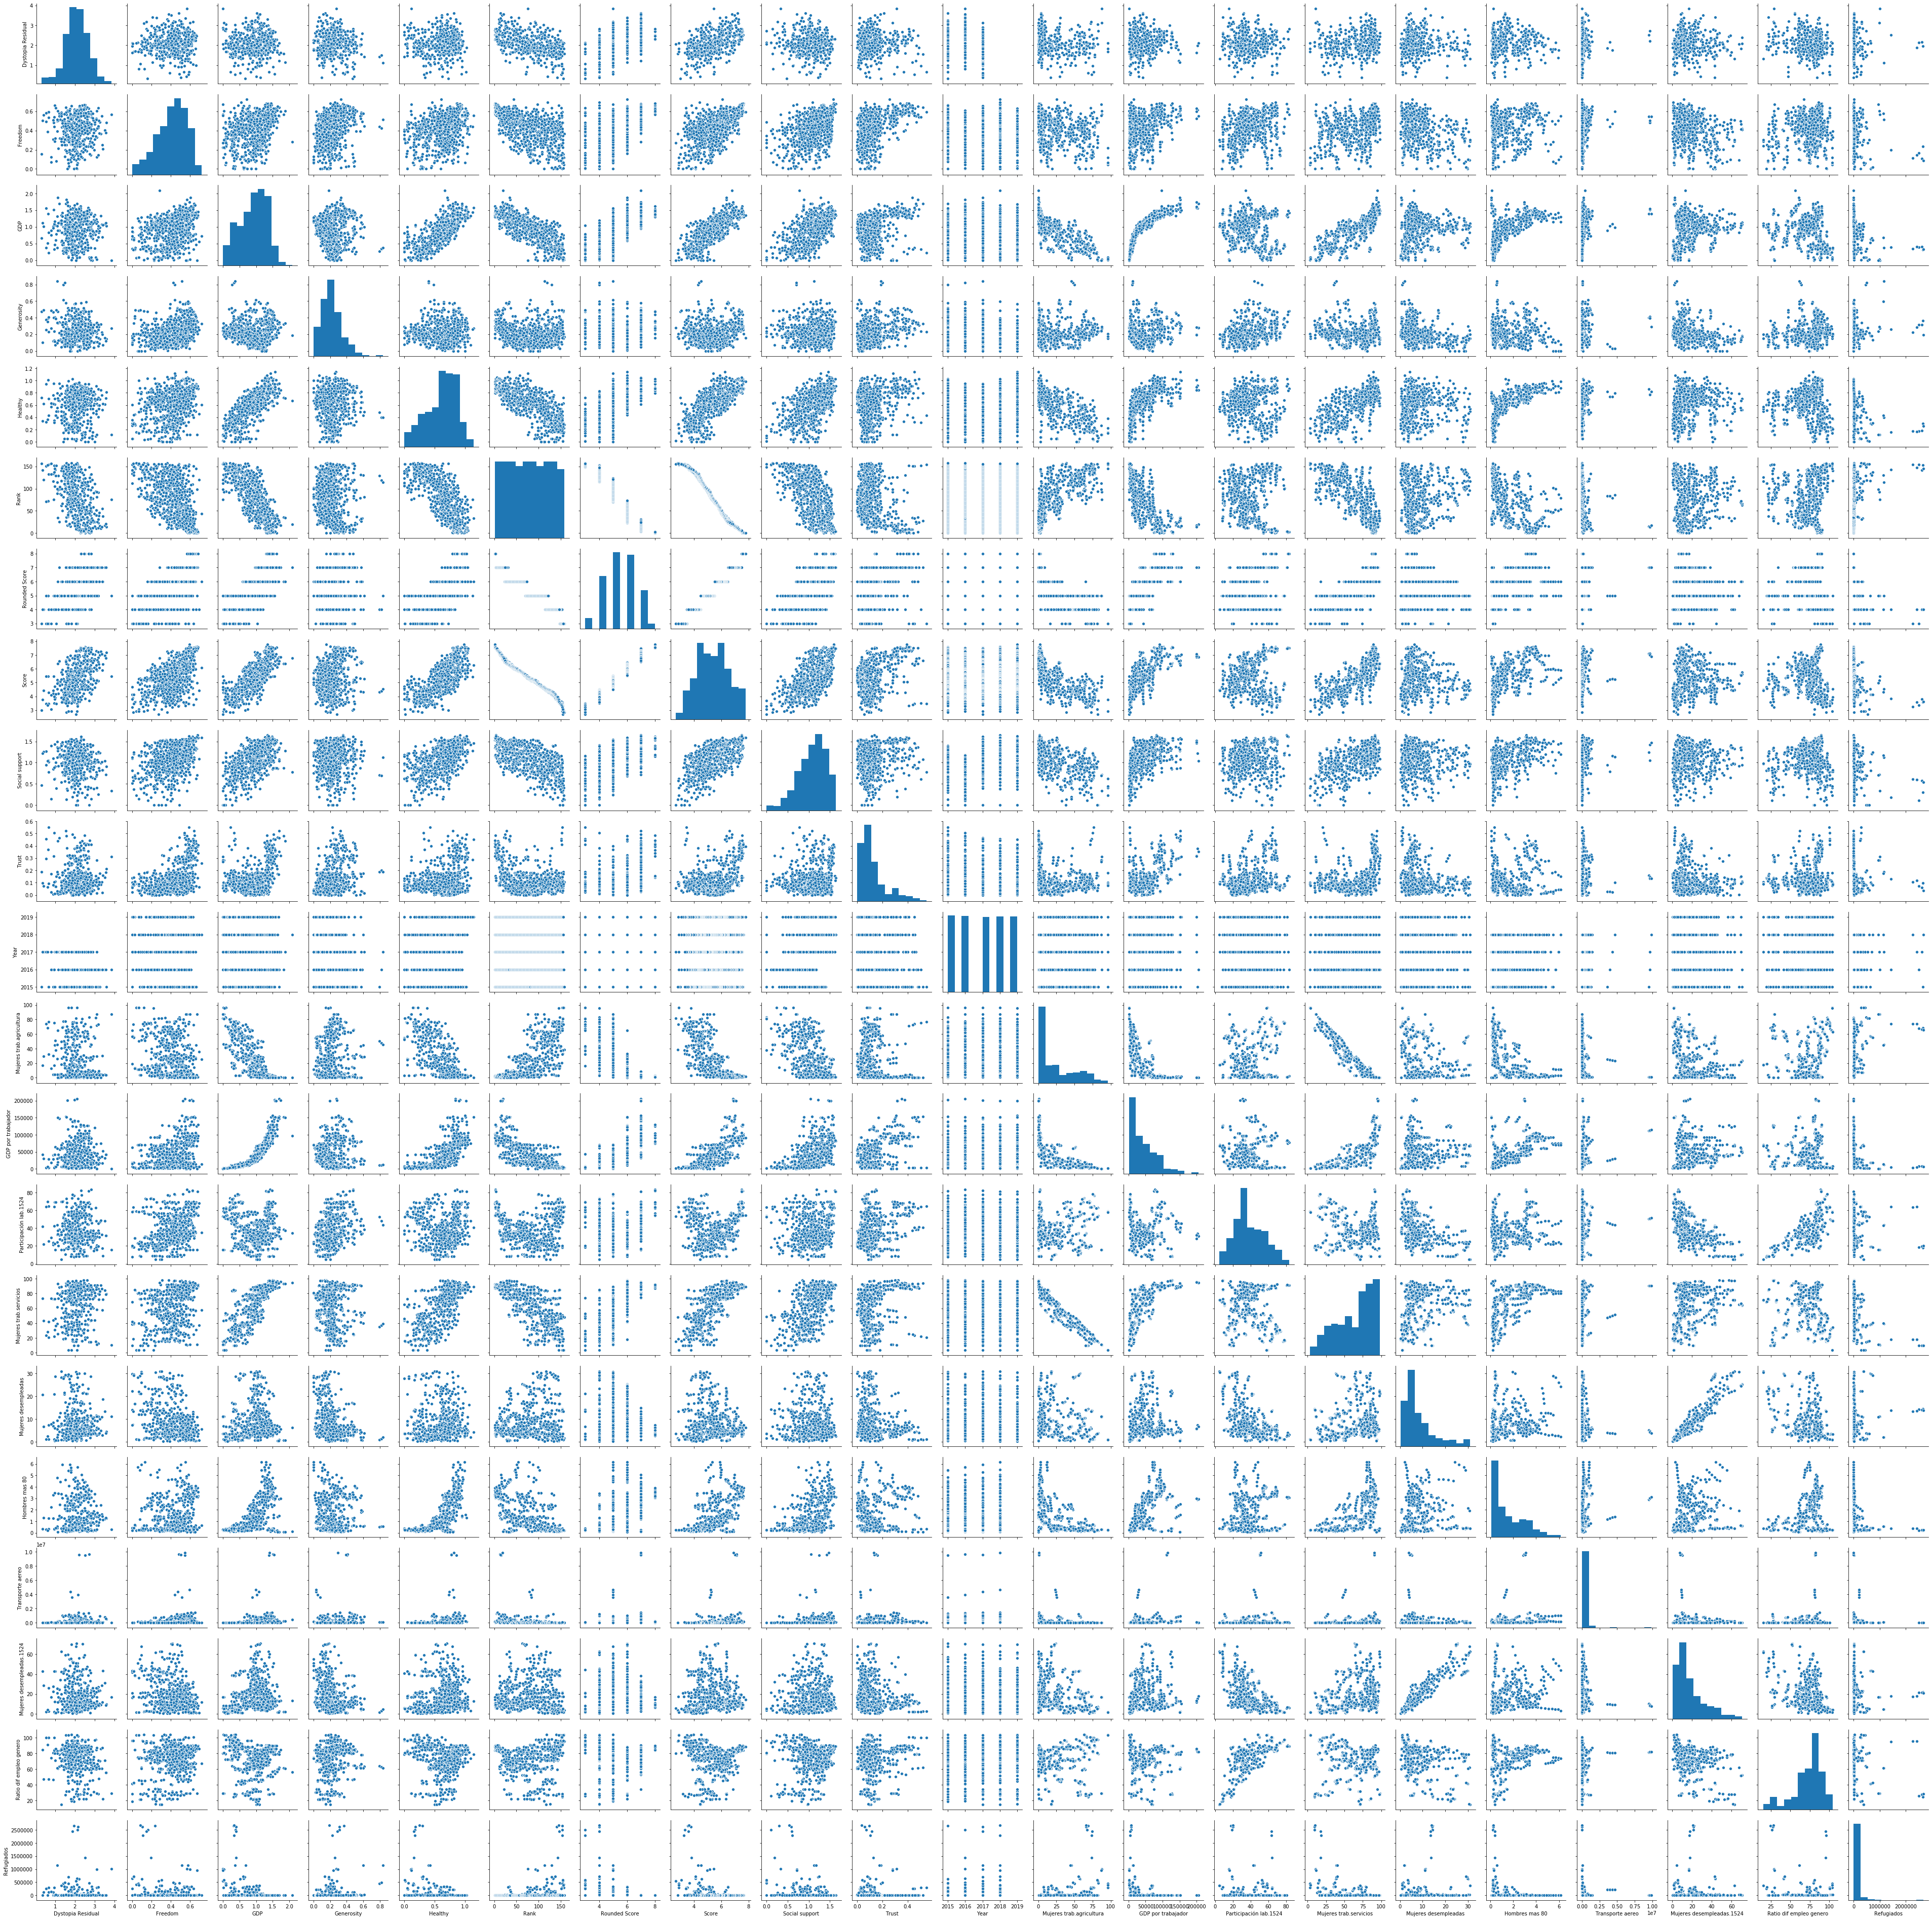

In [7]:
sns.pairplot(df)

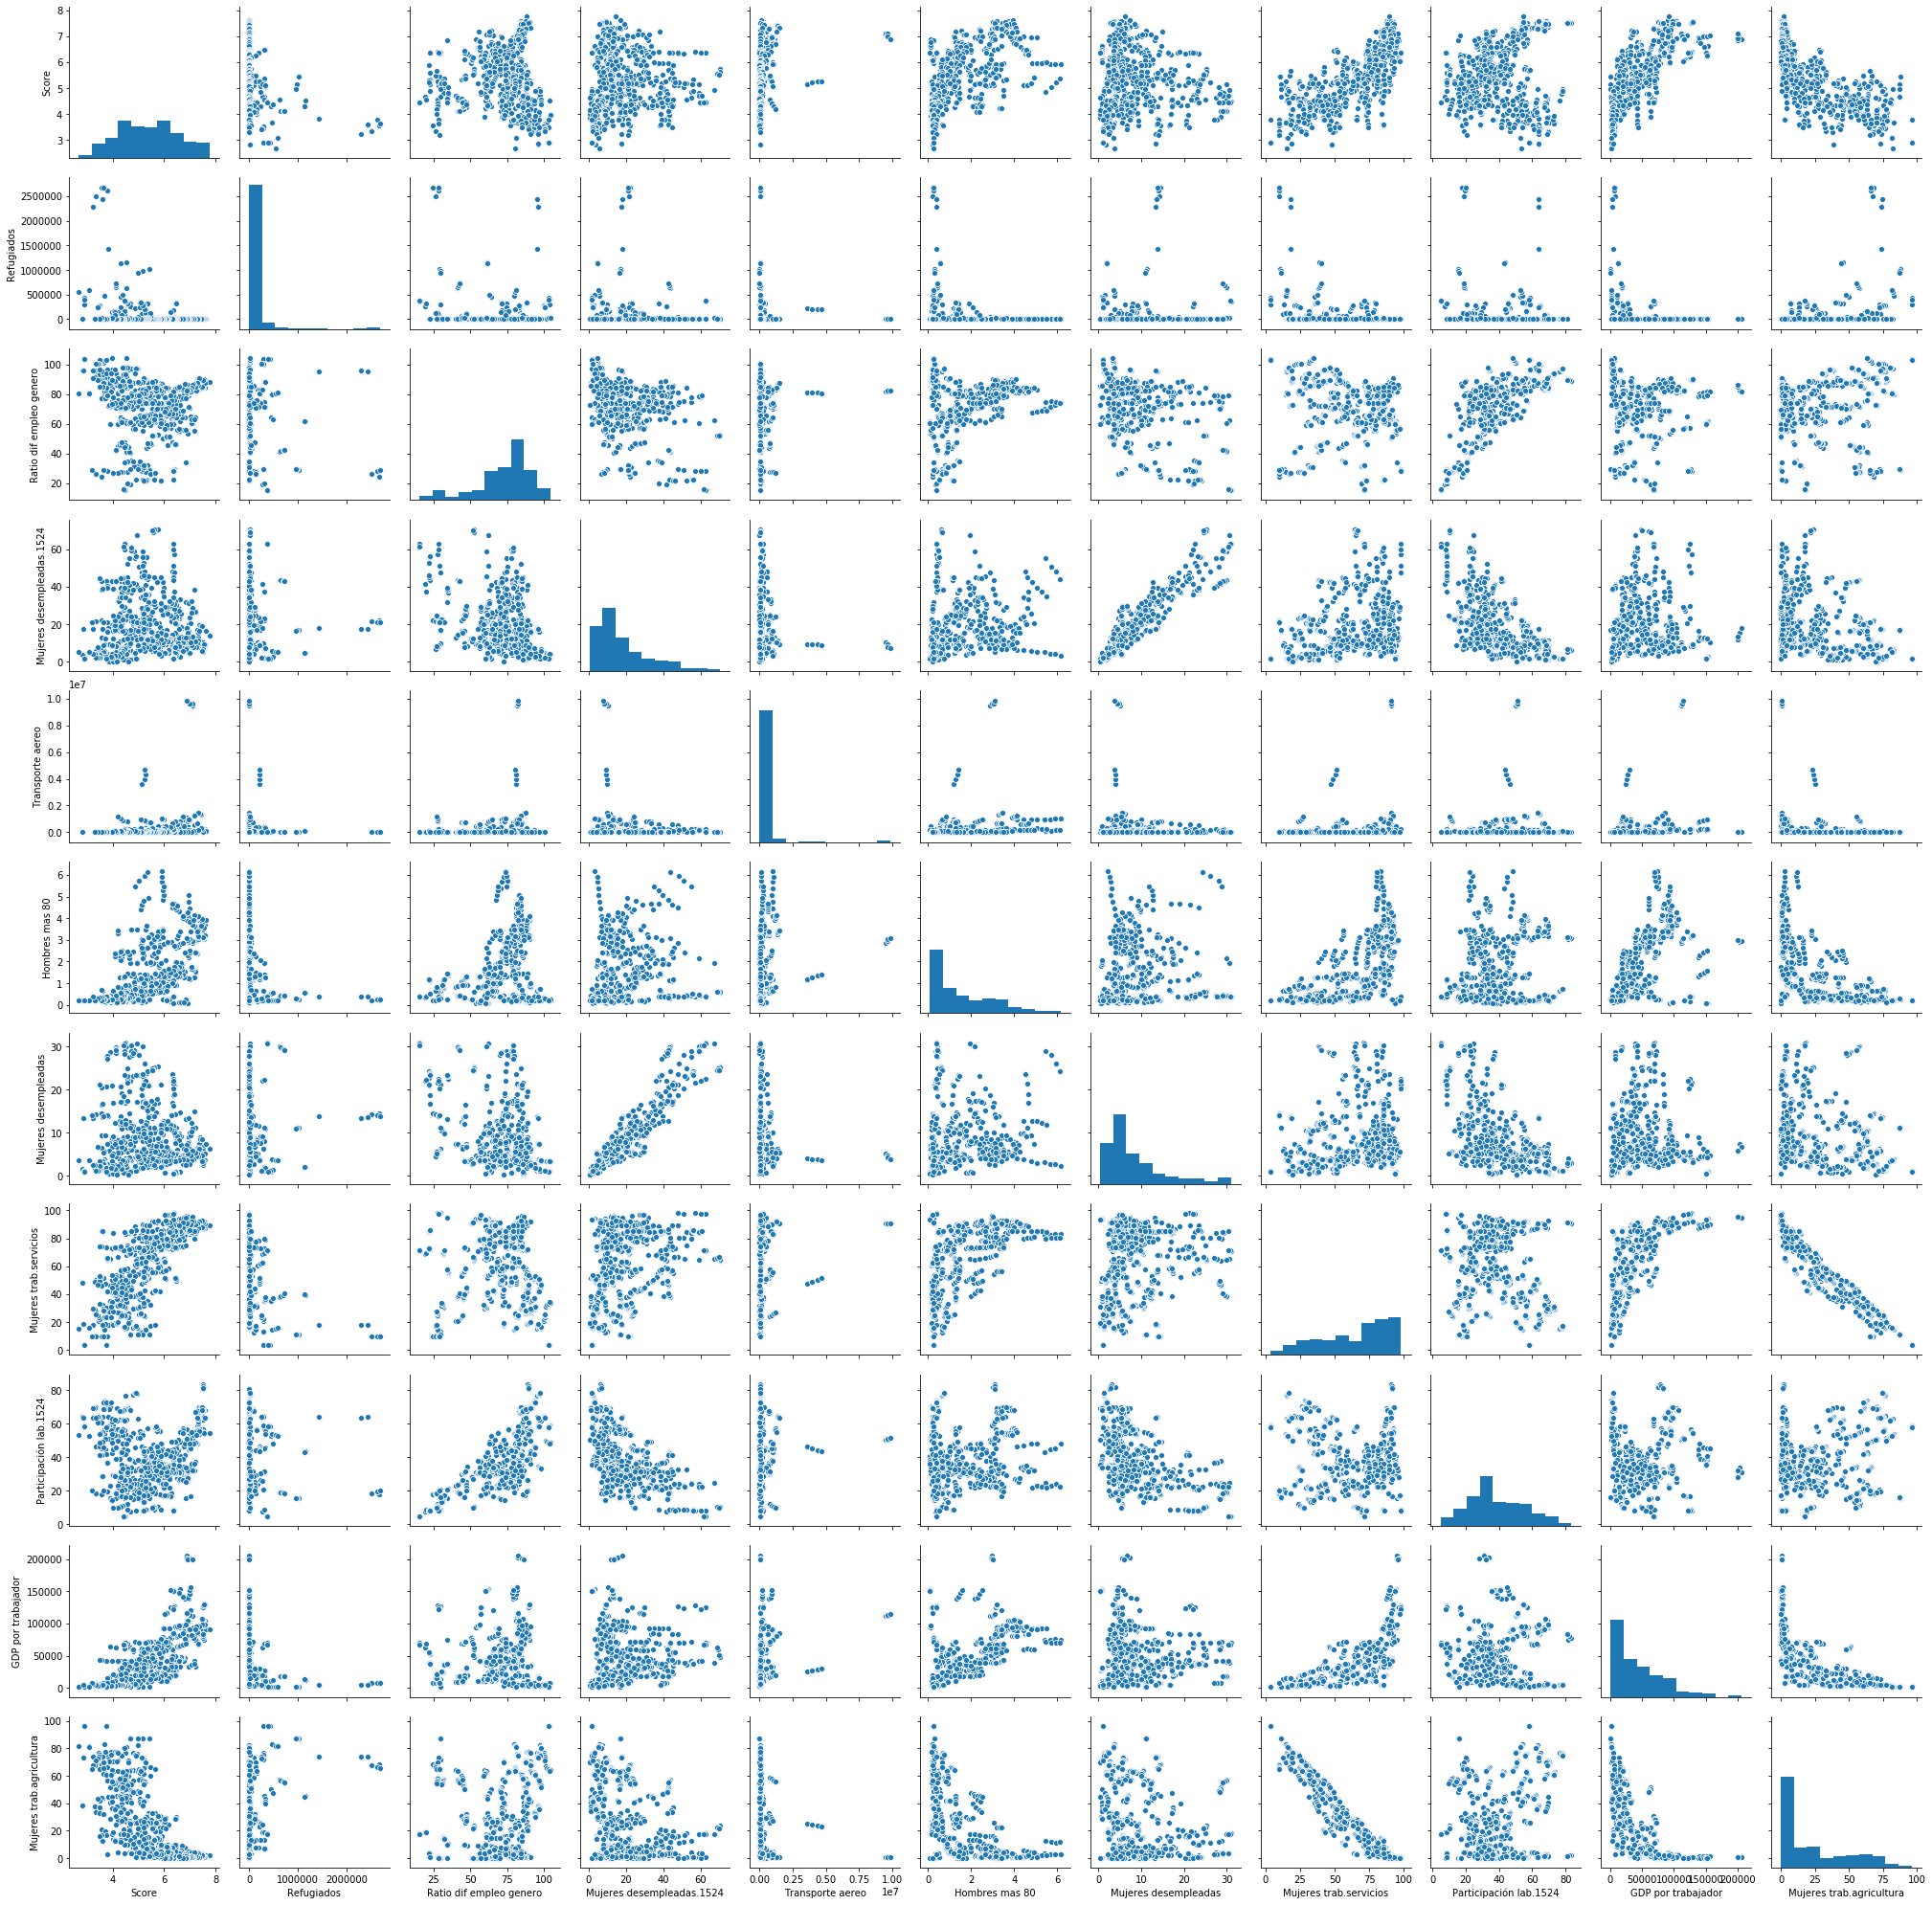

In [8]:
sns.pairplot(df, diag_kind='hist', vars=['Score','Refugiados','Ratio dif empleo genero','Mujeres desempleadas.1524','Transporte aereo','Hombres mas 80','Mujeres desempleadas','Mujeres trab.servicios', 'Participación lab.1524','GDP por trabajador', 'Mujeres trab.agricultura'])

In [9]:
df.corr()

Dystopia Residual   Freedom       GDP  Generosity  \
Dystopia Residual                   1.000000  0.038422  0.030087   -0.114468   
Freedom                             0.038422  1.000000  0.340511    0.290706   
GDP                                 0.030087  0.340511  1.000000   -0.014560   
Generosity                         -0.114468  0.290706 -0.014560    1.000000   
Healthy                             0.057674  0.340745  0.784338    0.010638   
Rank                               -0.482706 -0.537942 -0.794791   -0.117713   
Rounded Score                       0.496164  0.526308  0.751198    0.120716   
Score                               0.489747  0.551258  0.789284    0.137578   
Social support                     -0.081537  0.420361  0.585966   -0.037262   
Trust                               0.000001  0.459593  0.306307    0.318920   
Year                               -0.177951  0.010353  0.019768   -0.192587   
Mujeres trab.agricultura           -0.145036 -0.335868 -0.810426    0.050567   
GDP por trabajador                  0.039140  0.354584  0.871926    0.082896   
Participación lab.1524             -0.021286  0.274788 -0.149250    0.352215   
Mujeres trab.servicios              0.167129  0.350941  0.819297   -0.019506   
Mujeres desempleadas               -0.053304 -0.365352  0.086647   -0.346545   
Hombres mas 80                      0.076045  0.196062  0.636327   -0.016758   
Transporte aereo                    0.073710  0.129363  0.207766    0.100878   
Mujeres desempleadas.1524          -0.062146 -0.273544  0.186743   -0.329513   
Ratio dif empleo genero            -0.123672  0.129057 -0.091070    0.137222   
Refugiados                         -0.013547 -0.229900 -0.278939    0.119599   

                            Healthy      Rank  Rounded Score     Score  \
Dystopia Residual          0.057674 -0.482706       0.496164  0.489747   
Freedom                    0.340745 -0.537942       0.526308  0.551258   
GDP                        0.784338 -0.794791       0.751198  0.789284   
Generosity                 0.010638 -0.117713       0.120716  0.137578   
Healthy                    1.000000 -0.743655       0.700832  0.742456   
Rank                      -0.743655  1.000000      -0.958419 -0.992066   
Rounded Score              0.700832 -0.958419       1.000000  0.966224   
Score                      0.742456 -0.992066       0.966224  1.000000   
Social support             0.572650 -0.644842       0.615860  0.648799   
Trust                      0.250512 -0.372781       0.375974  0.398418   
Year                       0.130302 -0.007768      -0.021428  0.007065   
Mujeres trab.agricultura  -0.709805  0.740832      -0.708446 -0.732162   
GDP por trabajador         0.685699 -0.724311       0.700717  0.727041   
Participación lab.1524    -0.072653 -0.012978       0.046551  0.034903   
Mujeres trab.servicios     0.696151 -0.765997       0.734871  0.758913   
Mujeres desempleadas      -0.035482  0.136987      -0.138028 -0.131940   
Hombres mas 80             0.748967 -0.583901       0.564394  0.592967   
Transporte aereo           0.198480 -0.212865       0.196978  0.219052   
Mujeres desempleadas.1524  0.082437  0.044047      -0.062363 -0.045776   
Ratio dif empleo genero   -0.080213  0.044456       0.001839 -0.034359   
Refugiados                -0.285942  0.268205      -0.267406 -0.275363   

                           Social support     Trust  ...  \
Dystopia Residual               -0.081537  0.000001  ...   
Freedom                          0.420361  0.459593  ...   
GDP                              0.585966  0.306307  ...   
Generosity                      -0.037262  0.318920  ...   
Healthy                          0.572650  0.250512  ...   
Rank                            -0.644842 -0.372781  ...   
Rounded Score                    0.615860  0.375974  ...   
Score                            0.648799  0.398418  ...   
Social support                   1.000000  0.126401  ...   
Trust                            0.12

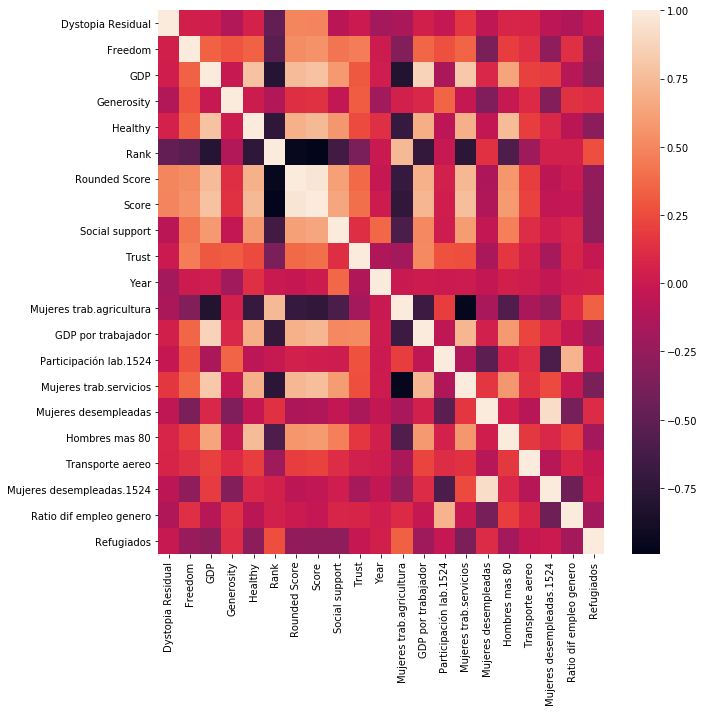

In [10]:
import matplotlib.pyplot as plt
f,ax=plt.subplots(figsize=(10,10))
cor = df.corr() 
sns.heatmap(cor)

In [11]:
df.describe()

Dystopia Residual     Freedom         GDP  Generosity     Healthy  \
count         470.000000  782.000000  782.000000  782.000000  782.000000   
mean            2.092717    0.411091    0.916047    0.218576    0.612416   
std             0.565772    0.152880    0.407340    0.122321    0.248309   
min             0.328580    0.000000    0.000000    0.000000    0.000000   
25%             1.737975    0.309768    0.606500    0.130000    0.440183   
50%             2.094640    0.431000    0.982205    0.201982    0.647310   
75%             2.455575    0.531000    1.236187    0.278832    0.808000   
max             3.837720    0.724000    2.096000    0.838075    1.141000   

             Rank  Rounded Score       Score  Social support       Trust  ...  \
count  782.000000     782.000000  782.000000      782.000000  781.000000  ...   
mean    78.698210       5.358056    5.379018        1.078392    0.125436  ...   
std     45.182384       1.147142    1.127456        0.329548    0.105816  ...   
min      1.000000       3.000000    2.693000        0.000000    0.000000  ...   
25%     40.000000       5.000000    4.509750        0.869363    0.054000  ...   
50%     79.000000       5.000000    5.322000        1.124735    0.091000  ...   
75%    118.000000       6.000000    6.189500        1.327250    0.156030  ...   
max    158.000000       8.000000    7.769000        1.644000    0.551910  ...   

       Mujeres trab.agricultura  GDP por trabajador  Participación lab.1524  \
count                682.000000          682.000000              682.000000   
mean                  24.358192        43545.999173               38.534098   
std                   25.670500        38366.754797               16.592250   
min                    0.009000         1026.063965                4.893000   
25%                    2.927000        11622.167236               26.883000   
50%                   14.015000        34027.548828               34.982500   
75%                   43.448749        67094.191406               50.846001   
max                   96.111000       205734.984375               83.412003   

       Mujeres trab.servicios  Mujeres desempleadas  Hombres mas 80  \
count              682.000000            682.000000      547.000000   
mean                63.859000              8.261427        1.573325   
std                 24.717520              6.859456        1.406398   
min                  3.446000              0.360000        0.076556   
25%                 43.607749              3.625000        0.375154   
50%                 72.304501              5.752500        1.159445   
75%                 85.179996             10.701750        2.639592   
max                 97.890999             31.020000        6.166254   

       Transporte aereo  Mujeres desempleadas.1524  Ratio dif empleo genero  \
count      4.710000e+02                 682.000000               682.000000   
mean       2.787015e+05                  18.005497                72.665327   
std        9.841274e+05                  14.374930                18.584835   
min        1.000000e+01                   0.357000                15.264789   
25%        1.165350e+04                   8.005000                63.875658   
50%        4.645000e+04                  12.841000                78.034691   
75%        1.705130e+05                  23.587500                84.995832   
max        9.879630e+06                  70.607002               104.173599   

         Refugiados  
count  5.320000e+02  
mean   7.604131e+04  
std    3.046050e+05  
min    1.000000e+00  
25%    1.577500e+02  
50%    1.425000e+03  
75%    1.244175e+04  
max    2.681269e+06  

[8 rows x 21 columns]

In [12]:
df.groupby(by='Year')['Score'].describe()

count      mean       std    min      25%     50%      75%    max
Year                                                                   
2015  158.0  5.375734  1.145010  2.839  4.52600  5.2325  6.24375  7.587
2016  157.0  5.382185  1.141674  2.905  4.40400  5.3140  6.26900  7.526
2017  155.0  5.354019  1.131230  2.693  4.50550  5.2790  6.10150  7.537
2018  156.0  5.375917  1.119506  2.905  4.45375  5.3780  6.16850  7.632
2019  156.0  5.407096  1.113120  2.853  4.54450  5.3795  6.18450  7.769

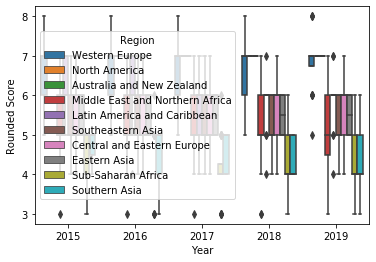

In [13]:
sns.boxplot(x="Year", y="Rounded Score", hue="Region", data=df)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

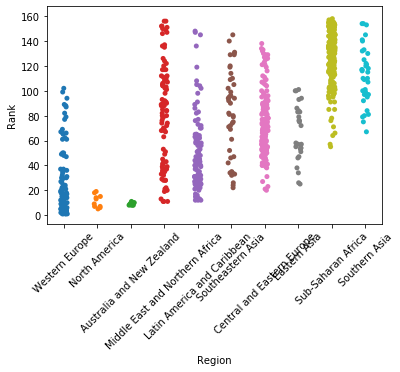

In [14]:
sns.stripplot(x="Region", y="Rank", data=df)
plt.xticks(rotation=45)

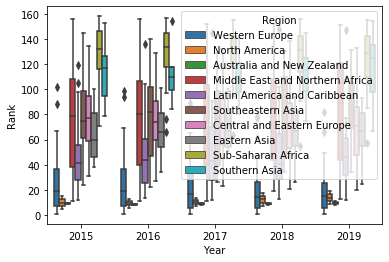

In [15]:
sns.boxplot(x="Year", y="Rank", hue="Region", data=df)

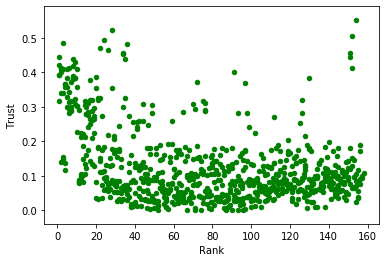

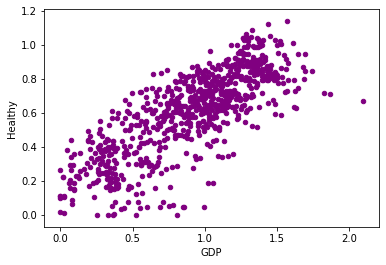

In [16]:
df.plot(kind='scatter', x='Rank', y='Trust',color = 'green')
df.plot(kind='scatter', x='GDP', y='Healthy',color = 'purple')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

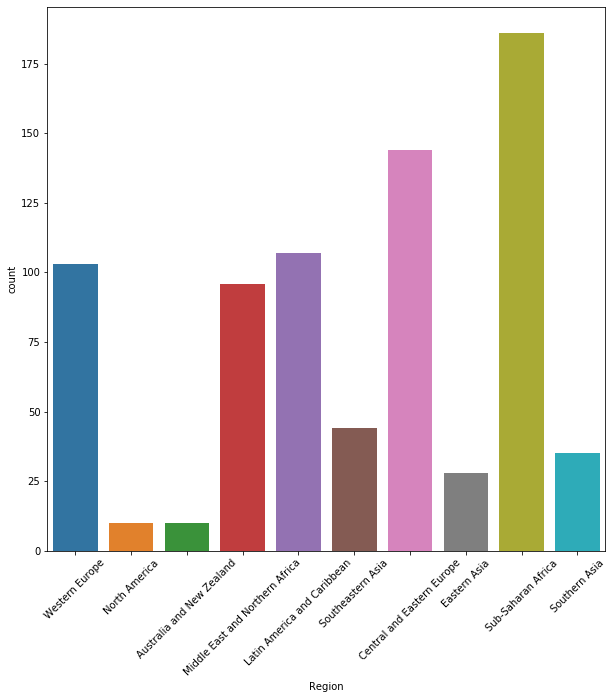

In [17]:
f,ax = plt.subplots(figsize =(10,10))
sns.countplot(df.Region)
plt.xticks(rotation= 45)

In [18]:
# remplazo de valores nulos
df=df.replace(np.nan, "0")
df

Country Dystopia Residual  Freedom      GDP  Generosity  \
0                 Switzerland           2.51738  0.66557  1.39651     0.29678   
1                     Iceland           2.70201  0.62877  1.30232     0.43630   
2                     Denmark           2.49204  0.64938  1.32548     0.34139   
3                      Norway           2.46531  0.66973  1.45900     0.34699   
4                      Canada           2.45176  0.63297  1.32629     0.45811   
..                        ...               ...      ...      ...         ...   
777                    Rwanda                 0  0.55500  0.35900     0.21700   
778                  Tanzania                 0  0.41700  0.47600     0.27600   
779               Afghanistan                 0  0.00000  0.35000     0.15800   
780  Central African Republic                 0  0.22500  0.02600     0.23500   
781               South Sudan                 0  0.01000  0.30600     0.20200   

     Healthy  Rank              Region  Rounded Score  Score  ...  \
0    0.94143     1      Western Europe            8.0  7.587  ...   
1    0.94784     2      Western Europe            8.0  7.561  ...   
2    0.87464     3      Western Europe            8.0  7.527  ...   
3    0.88521     4      Western Europe            8.0  7.522  ...   
4    0.90563     5       North America            7.0  7.427  ...   
..       ...   ...                 ...            ...    ...  ...   
777  0.61400   152  Sub-Saharan Africa            3.0  3.334  ...   
778  0.49900   153  Sub-Saharan Africa            3.0  3.231  ...   
779  0.36100   154       Southern Asia            3.0  3.203  ...   
780  0.10500   155  Sub-Saharan Africa            3.0  3.083  ...   
781  0.29500   156                   0            3.0  2.853  ...   

     Mujeres trab.agricultura GDP por trabajador  Participación lab.1524  \
0                       2.872             103603                  68.313   
1                       1.744            75040.6                  81.785   
2                       1.059            94613.5                   62.39   
3                       0.921             125677                  56.618   
4                       1.015            84005.4                  64.449   
..                        ...                ...                     ...   
777                    71.512            4223.94                  63.733   
778                    67.432            6497.99                  69.106   
779                     65.23             6984.9                  20.404   
780                    81.317            2048.33                  52.889   
781                    73.223            4464.73                  63.477   

    Mujeres trab.servicios Mujeres desempleadas Hombres mas 80  \
0                   87.031                4.912        3.70526   
1                    91.33                4.051        3.02985   
2                   89.277                6.444        3.21888   
3                    91.87                3.999        3.12968   
4                   90.434                6.285         3.2708   
..                     ...                  ...            ...   
777                 25.662                 1.07              0   
778                 29.461                2.462              0   
779                 10.079               14.004              0   
780                 15.996                3.565              0   
781                 18.926               13.406              0   

    Transporte aereo Mujeres desempleadas.1524 Ratio dif empleo genero  \
0             250094                      8.39                 84.0807   
1              35558                     6.638                 90.3024   
2                  0                    10.027                 86.8573   
3                  0                     8.565                 89.6324   
4        1.32203e+06                    11.228                 86.2951   
..               ...                       ...                     ...

In [19]:
# Definir la variable objetivo
data = pd.DataFrame(df, columns=['Dystopia Residual','Freedom','GDP','Healthy','Generosity','Social support','Trust','Refugiados','Ratio dif empleo genero','Mujeres desempleadas.1524','Transporte aereo','Hombres mas 80','Mujeres desempleadas','Mujeres trab.servicios', 'Participación lab.1524','GDP por trabajador', 'Mujeres trab.agricultura'])
y=df['Score']

data.head()

Dystopia Residual  Freedom      GDP  Healthy  Generosity  Social support  \
0           2.51738  0.66557  1.39651  0.94143     0.29678         1.34951   
1           2.70201  0.62877  1.30232  0.94784     0.43630         1.40223   
2           2.49204  0.64938  1.32548  0.87464     0.34139         1.36058   
3           2.46531  0.66973  1.45900  0.88521     0.34699         1.33095   
4           2.45176  0.63297  1.32629  0.90563     0.45811         1.32261   

     Trust Refugiados Ratio dif empleo genero Mujeres desempleadas.1524  \
0  0.41978         17                 84.0807                      8.39   
1  0.14145          0                 90.3024                     6.638   
2  0.48357          9                 86.8573                    10.027   
3  0.36503         12                 89.6324                     8.565   
4  0.32957         80                 86.2951                    11.228   

  Transporte aereo Hombres mas 80 Mujeres desempleadas Mujeres trab.servicios  \
0           250094        3.70526                4.912                 87.031   
1            35558        3.02985                4.051                  91.33   
2                0        3.21888                6.444                 89.277   
3                0        3.12968                3.999                  91.87   
4      1.32203e+06         3.2708                6.285                 90.434   

  Participación lab.1524 GDP por trabajador Mujeres trab.agricultura  
0                 68.313             103603                    2.872  
1                 81.785            75040.6                    1.744  
2                  62.39            94613.5                    1.059  
3                 56.618             125677                    0.921  
4                 64.449            84005.4                    1.015

In [20]:
# Hacemos la partición de los datos
X_train, X_test, y_train, y_test=train_test_split(data, y, test_size=0.20, random_state=42)

In [21]:
'''Modelo con regresion lineal'''

# Modelo de regresión lineal para conocer las variables más influyentes
regmodel=linear_model.LinearRegression()
regmodel=regmodel.fit(X_train, y_train)

In [22]:
# MSE y R2
y_pred=regmodel.predict(X_test)
print('Coefficients: \n', regmodel.coef_)
print('Mean squared error (MSE): %.2f' % mean_squared_error(y_test, y_pred))
print('R-cuadrado: %.2f' % r2_score(y_test, y_pred))
#error=np.sqrt(mean_squared_error(y_test, y_pred))
#r2=regmodel.score(y_test, y_pred)
#error
#r2

Coefficients: 
 [ 2.58589795e-01  1.14727819e+00  4.56852479e-01  1.23512132e+00
 -1.39521660e-01  1.03939631e+00  5.29356332e-01  5.70025875e-08
 -9.11680050e-03 -1.49008582e-02  1.03758566e-08  4.69382409e-03
  5.48148235e-03  1.15358747e-02  3.99630264e-03  2.09497095e-06
  3.84190053e-03]
Mean squared error (MSE): 0.24
R-cuadrado: 0.81


In [27]:
# Tabla coeficientes
pd.DataFrame(regmodel.coef_, X_train.columns, columns=['Coefficient'])

Coefficient
Dystopia Residual          2.585898e-01
Freedom                    1.147278e+00
GDP                        4.568525e-01
Healthy                    1.235121e+00
Generosity                -1.395217e-01
Social support             1.039396e+00
Trust                      5.293563e-01
Refugiados                 5.700259e-08
Ratio dif empleo genero   -9.116801e-03
Mujeres desempleadas.1524 -1.490086e-02
Transporte aereo           1.037586e-08
Hombres mas 80             4.693824e-03
Mujeres desempleadas       5.481482e-03
Mujeres trab.servicios     1.153587e-02
Participación lab.1524     3.996303e-03
GDP por trabajador         2.094971e-06
Mujeres trab.agricultura   3.841901e-03

In [30]:
# Regresión lineal importando la api de statsmodels (análisis estadístico t)
import statsmodels.formula.api as smf
import statsmodels.api as sm
regmodel2=smf.ols(formula='Score ~ Dystopia Residual+Freedom+GDP+Healthy+Generosity+Social support+Trust+Refugiados+Ratio dif empleo genero+Mujeres desempleadas.1524+Transporte aereo+Hombres mas 80+Mujeres desempleadas+Mujeres trab.servicios+Participación lab.1524+GDP por trabajador+Mujeres trab.agricultura', data=df).fit()
regmodel2.summary() 

SyntaxError: invalid syntax (<unknown>, line 1)

TypeError: unhashable type: 'numpy.ndarray'

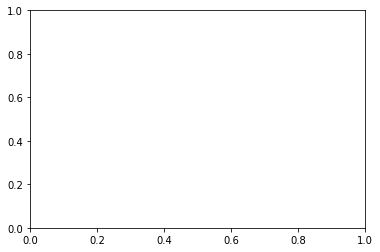

In [31]:
# Gráficos resultados
plt.scatter(X_test, y_test, color ='red', label='Datos') 
plt.plot(X_test, y_pred, color = 'blue', label='Regresión lineal', linewidth=3)
plt.legend(('Regresión lineal',),
            loc='lower right')
plt.title('Modelo de regresión lineal múltiple')
plt.xticks()
plt.yticks()
plt.show()

In [ ]:
'NO COPIAR'
#'''Modelo con random forest regressor'''

#from sklearn.ensemble import RandomForestRegressor
#from sklearn.datasets import make_regression
#from sklearn.ensemble import RandomForestClassifier

# Definir variable objetivo
#data = pd.DataFrame(df, columns=['Score','Dystopia Residual','Freedom','GDP','Healthy','Generosity','Social support','Trust','Refugiados','Ratio dif empleo genero','Mujeres desempleadas.1524','Transporte aereo','Hombres mas 80','Mujeres desempleadas','Mujeres trab.servicios', 'Participación lab.1524','GDP por trabajador', 'Mujeres trab.agricultura'])
#y=df['Score']

# Hacemos la partición de los datos
#X_train, X_test, y_train, y_test=train_test_split(data, y, test_size=0.20, random_state=42)

# Instanciamos el modelo random forest con 1000 árboles de decisión 
#rf=RandomForestRegressor(n_estimators=1000, random_state=42)
#rf.fit(X_train, y_train)

#error=np.sqrt(mean_squared_error(y_test, y_pred))
#r2=rf.score(y_test, y_pred)

#error
#r2

# Nombrar y ordenar desc las variables
#importances = rf.feature_importances_
#indices = np.argsort(importances)[::-1]

# Ordenamos los nombres de las columnas siguiendo los indices calculados
#names = [df.columns[i] for i in indices]

# Visualización importancia variables 
#plt.bar(range(X_train.shape[1]), importances[indices])
#plt.xticks(range(X_train.shape[1]), names, rotation=90, fontsize = 8)
#plt.title("Importancia variables")
#plt.show()
